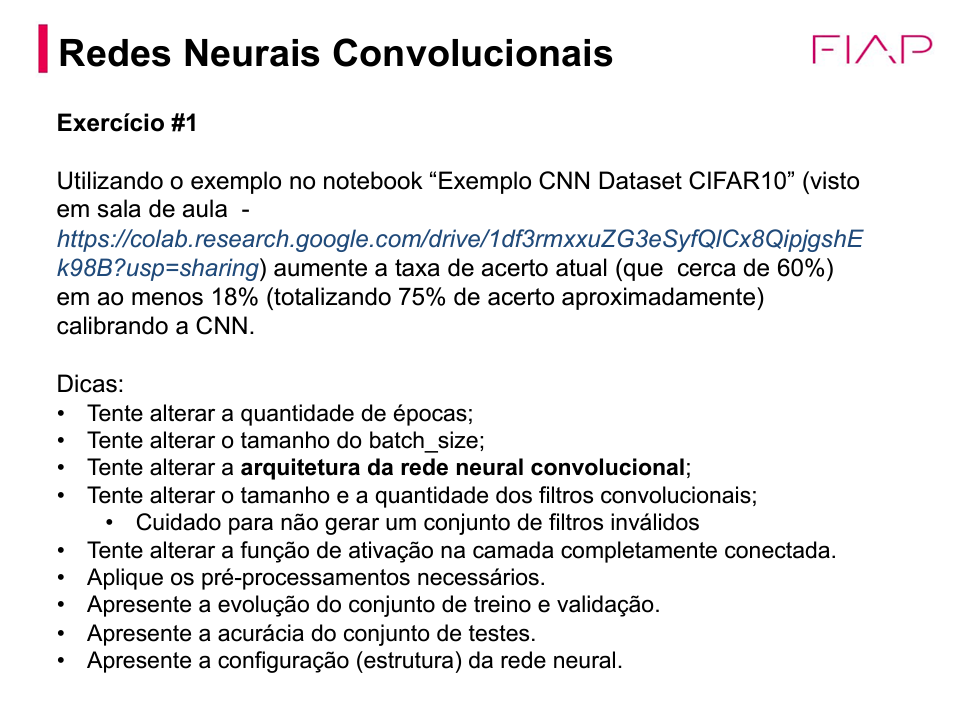

### Trabalho desenvolvido durante o MBA em Data Science / IA na FIAP - 2022~2023.

### Prof. Felipe Teodoro

### 1. Carregando Bibliotecas

In [1]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from keras.utils import np_utils
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import  to_categorical
import tensorflow as tf

Inicializa o Google Drive. É necessário entrar com as credenciais do Gmail

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2. Carregando o dataset pré-embaralhado de treinamento bem como os dados de teste

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


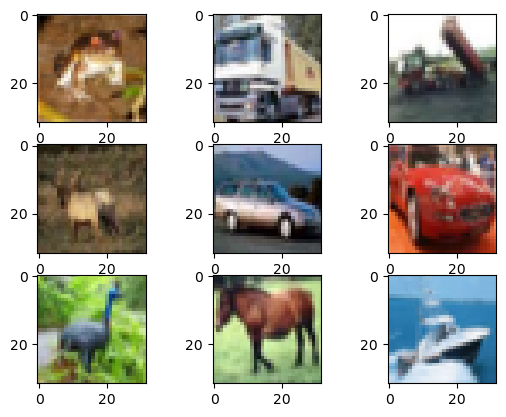

In [3]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i])
# show the figure
plt.show()

### 3. Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [4]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Dividindo o dataset em treinamento, teste e validação

"One-hot encoding" aplicado aos rótulos


In [5]:
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [6]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
y_train.shape

(50000, 10)

In [8]:
num_classes

10

In [9]:
x_train.shape

(50000, 32, 32, 3)

divindo dataset de treinamento em treinamento, teste e validação - Apenas para exemplo em um ambiente real as amostras devem ser seleciondas de forma aleatória

In [10]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

Impressão da forma do conjunto de treino

In [11]:
print('x_train shape:', x_train.shape)

x_train shape: (45000, 32, 32, 3)


In [12]:
print('x_valid shape:', x_valid.shape)

x_valid shape: (5000, 32, 32, 3)


Impressão do número de imagens nos datasets de treinamento, teste e validação

In [13]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

45000 train samples
10000 test samples
5000 validation samples


### 5. Definindo a arquitetura do modelo (IMPORTANTE!) - Dicas

*   Tente utilizar 2-4 camadas convolucionais de tamanho progressivamente crescente
*   Use no máximo de 2 ou 3 camadas de "pooling" (2x2) após as camadas convolucionais
*   Use uma camada do tipo totalmente conectada de 128-512 neurônios
*   Use uma camada do tipo totalmente conectada de 64-256 neurônios
*   Ultimas camadas do tipo totalmente conectadas de 10 saídas (10 classes de categoria de imagem)
*   "Dropout" de 0,2-0,3







qtd camadas pooling
qtd camadas densas
activation


In [14]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3,  activation='relu', input_shape=(32, 32, 3)))
#model.add(Conv2D(32, (3,3)),  activation='relu', input_shape=(32, 32, 3)))

model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

Tentem executar a rede configurando outras funções de ativação (como visto em nossa Aula 3)
mais informações em https://keras.io/activations/

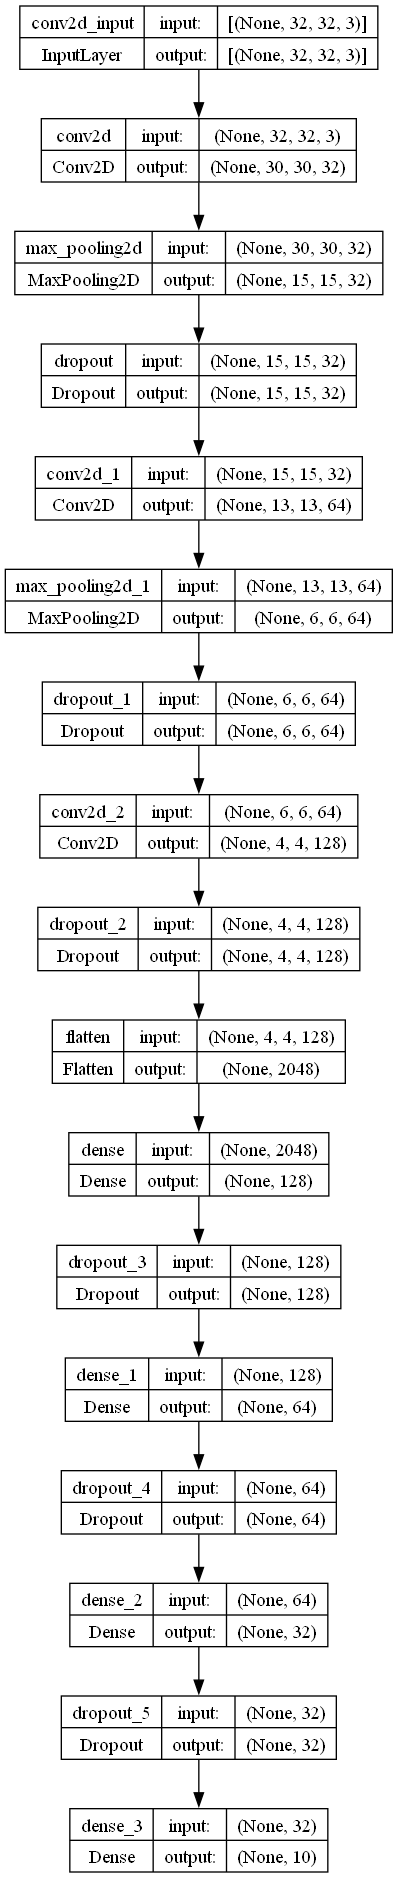

In [15]:
plot_model(model, to_file='cnn-CIFAR10.png', show_shapes=True, show_layer_names=True)

### 6. Compilando o modelo

Compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
* mais informações em https://keras.io/losses/
* mais informações em https://keras.io/optimizers/
* mais informações em https://keras.io/metrics/

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 7. Treinando o modelo

In [17]:
from keras.callbacks import ModelCheckpoint

#O keras passa a salvar o melhor modelo pela acurácia de validação

In [19]:
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/modelos/modelocifar_FIAP_CNN.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy') #

hist = model.fit(x_train, y_train, batch_size=100, epochs=128, validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/128
449/450 [============================>.] - ETA: 0s - loss: 1.5937 - accuracy: 0.4124
Epoch 1: val_accuracy improved from -inf to 0.51860, saving model to /modelocifar_FIAP_CNN.hdf5
450/450 [==============================] - 19s 43ms/step - loss: 1.5937 - accuracy: 0.4125 - val_loss: 1.3762 - val_accuracy: 0.5186
Epoch 2/128
450/450 [==============================] - ETA: 0s - loss: 1.3882 - accuracy: 0.5061
Epoch 2: val_accuracy improved from 0.51860 to 0.57420, saving model to /modelocifar_FIAP_CNN.hdf5
450/450 [==============================] - 19s 42ms/step - loss: 1.3882 - accuracy: 0.5061 - val_loss: 1.1819 - val_accuracy: 0.5742
Epoch 3/128
450/450 [==============================] - ETA: 0s - loss: 1.2593 - accuracy: 0.5588
Epoch 3: val_accuracy improved from 0.57420 to 0.62960, saving model to /modelocifar_FIAP_CNN.hdf5
450/450 [==============================] - 18s 40ms/step - loss: 1.2593 - accuracy: 0.5588 - val_loss: 1.0539 - val_accuracy: 0.6296
Epoch 4/128
449/

Epoch 55/128
449/450 [============================>.] - ETA: 0s - loss: 0.4972 - accuracy: 0.8353
Epoch 55: val_accuracy did not improve from 0.78160
450/450 [==============================] - 20s 45ms/step - loss: 0.4975 - accuracy: 0.8353 - val_loss: 0.7144 - val_accuracy: 0.7752
Epoch 56/128
449/450 [============================>.] - ETA: 0s - loss: 0.5057 - accuracy: 0.8312
Epoch 56: val_accuracy did not improve from 0.78160
450/450 [==============================] - 20s 44ms/step - loss: 0.5060 - accuracy: 0.8312 - val_loss: 0.7202 - val_accuracy: 0.7772
Epoch 57/128
450/450 [==============================] - ETA: 0s - loss: 0.4921 - accuracy: 0.8353
Epoch 57: val_accuracy did not improve from 0.78160
450/450 [==============================] - 21s 47ms/step - loss: 0.4921 - accuracy: 0.8353 - val_loss: 0.7341 - val_accuracy: 0.7762
Epoch 58/128
450/450 [==============================] - ETA: 0s - loss: 0.5028 - accuracy: 0.8328
Epoch 58: val_accuracy did not improve from 0.78160
4

Epoch 84/128
450/450 [==============================] - ETA: 0s - loss: 0.4420 - accuracy: 0.8548
Epoch 84: val_accuracy did not improve from 0.78500
450/450 [==============================] - 19s 43ms/step - loss: 0.4420 - accuracy: 0.8548 - val_loss: 0.7076 - val_accuracy: 0.7846
Epoch 85/128
450/450 [==============================] - ETA: 0s - loss: 0.4290 - accuracy: 0.8581
Epoch 85: val_accuracy improved from 0.78500 to 0.78820, saving model to /modelocifar_FIAP_CNN.hdf5
450/450 [==============================] - 19s 43ms/step - loss: 0.4290 - accuracy: 0.8581 - val_loss: 0.7197 - val_accuracy: 0.7882
Epoch 86/128
449/450 [============================>.] - ETA: 0s - loss: 0.4268 - accuracy: 0.8574
Epoch 86: val_accuracy did not improve from 0.78820
450/450 [==============================] - 19s 42ms/step - loss: 0.4267 - accuracy: 0.8575 - val_loss: 0.7287 - val_accuracy: 0.7806
Epoch 87/128
450/450 [==============================] - ETA: 0s - loss: 0.4265 - accuracy: 0.8581
Epoch

450/450 [==============================] - 20s 44ms/step - loss: 0.3974 - accuracy: 0.8696 - val_loss: 0.7412 - val_accuracy: 0.7824
Epoch 113/128
450/450 [==============================] - ETA: 0s - loss: 0.3828 - accuracy: 0.8759
Epoch 113: val_accuracy did not improve from 0.79040
450/450 [==============================] - 20s 44ms/step - loss: 0.3828 - accuracy: 0.8759 - val_loss: 0.7257 - val_accuracy: 0.7824
Epoch 114/128
450/450 [==============================] - ETA: 0s - loss: 0.3947 - accuracy: 0.8705
Epoch 114: val_accuracy did not improve from 0.79040
450/450 [==============================] - 19s 42ms/step - loss: 0.3947 - accuracy: 0.8705 - val_loss: 0.7389 - val_accuracy: 0.7830
Epoch 115/128
450/450 [==============================] - ETA: 0s - loss: 0.3896 - accuracy: 0.8713
Epoch 115: val_accuracy did not improve from 0.79040
450/450 [==============================] - 19s 43ms/step - loss: 0.3896 - accuracy: 0.8713 - val_loss: 0.7431 - val_accuracy: 0.7862
Epoch 116/12

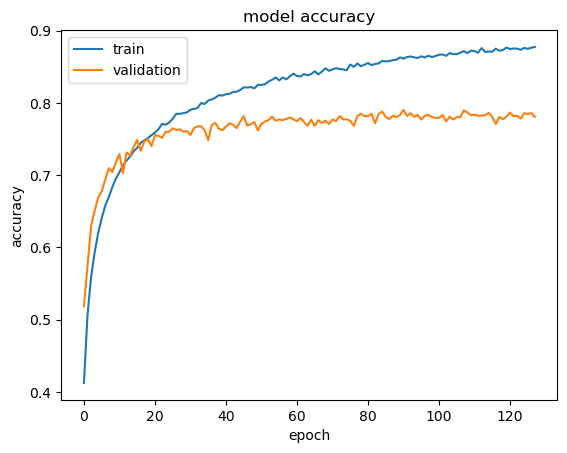

In [20]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Carregar o melhor modelo que obteve a melhor acurácia de validação no treinamento

In [21]:
model = load_model("/content/drive/My Drive/modelos/modelocifar_FIAP_CNN.hdf5")

### 8. Cálculo da precisão de classificação no dataset de testes

Avaliar e imprimir a precisão do teste

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7777000069618225


### 9. Visualizar algumas predições

As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.
Obtendo previsões no conjunto de testes:

In [23]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [24]:
y_hat = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [25]:
y_hat

array([[3.43378792e-06, 1.25597111e-07, 4.99414346e-05, ...,
        1.02679674e-04, 9.57428983e-06, 3.63073059e-06],
       [5.97413513e-04, 3.83554323e-07, 8.66165895e-09, ...,
        3.06931494e-11, 9.99401331e-01, 8.33118634e-07],
       [2.58006603e-02, 2.57817941e-04, 1.26837767e-04, ...,
        2.04830540e-05, 9.71756339e-01, 1.56982697e-03],
       ...,
       [6.27097263e-09, 3.86306376e-10, 4.11867513e-04, ...,
        2.14075044e-04, 2.93635949e-10, 1.30890832e-09],
       [5.44077195e-02, 8.17287982e-01, 1.99269340e-03, ...,
        1.77392270e-03, 9.12971329e-03, 9.02957283e-03],
       [1.51852774e-13, 1.00925680e-20, 2.58018218e-10, ...,
        9.99985218e-01, 5.51614390e-25, 2.40760509e-14]], dtype=float32)

In [26]:
y_hat[100,:]

array([3.6669375e-05, 1.8766027e-06, 5.7781753e-03, 6.3518239e-03,
       9.1491044e-01, 3.2946087e-02, 4.9321010e-04, 3.9433043e-02,
       2.2270837e-07, 4.8438535e-05], dtype=float32)

In [27]:
np.argmax(y_hat[100,:])

4

In [28]:
y_test[100,:]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [29]:
np.argmax(y_test[100,:])

4

Definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)

Plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10

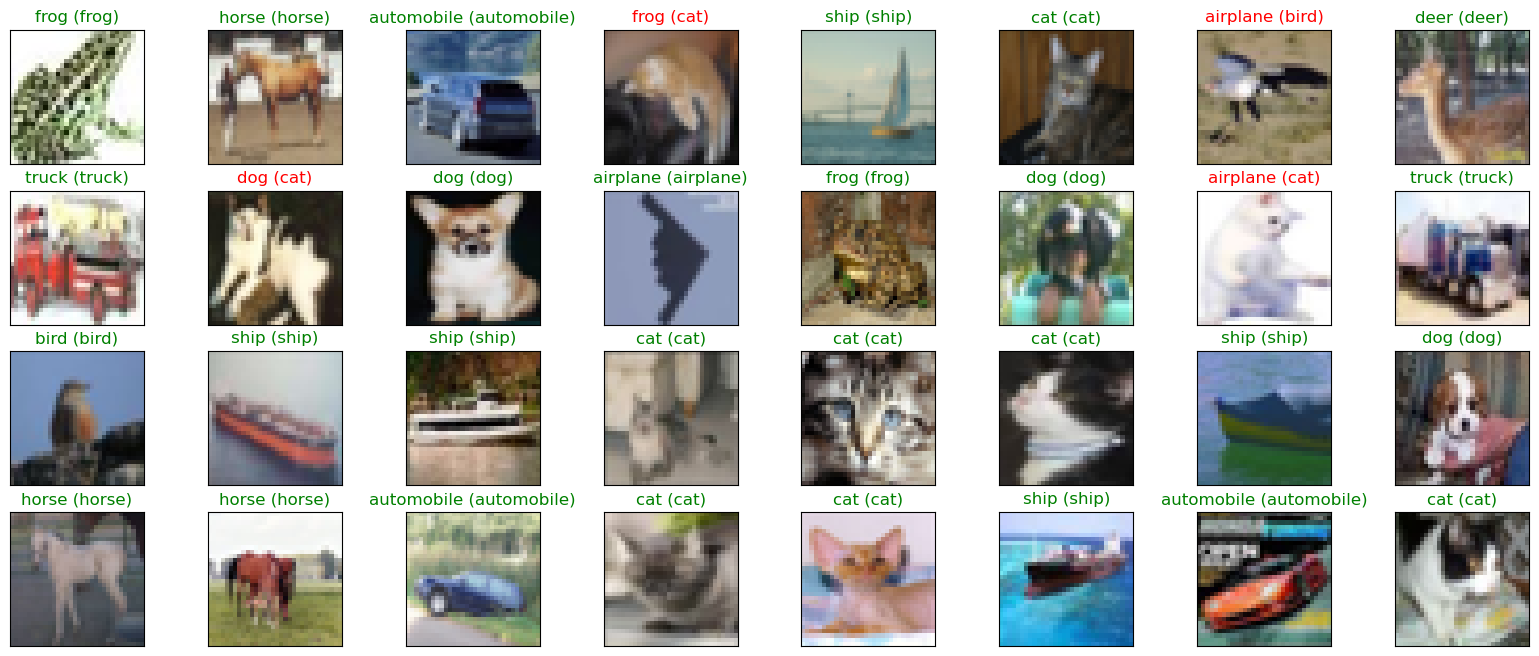

In [30]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificaas em verde, incorretamente classificadas em vermelho
